# Sentiment Review Analysis On Farzi Cafe, Indore

In [5]:
import pandas as pd
import numpy as np  
import nltk
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
try:
    stopwords.words('english')
except LookupError:
    nltk.download('stopwords')
try:
    nltk.data.find('tokenizers/punkt')
except LookupError:
    nltk.download('punkt')
import matplotlib.pyplot as plt
import seaborn as sns
from textblob import TextBlob
import ast
import openpyxl

In [6]:
Farzi=pd.read_excel(r"C:\Users\parth\Desktop\FARZI.xlsx") 

In [7]:
Farzi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stars   1000 non-null   int64 
 1   text    537 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


In [8]:
Farzi.dropna(subset=("text"), inplace = True)

In [9]:
Farzi.info()

<class 'pandas.core.frame.DataFrame'>
Index: 537 entries, 1 to 999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   stars   537 non-null    int64 
 1   text    537 non-null    object
dtypes: int64(1), object(1)
memory usage: 12.6+ KB


In [10]:
Farzi['lowercase_text'] = Farzi['text'].str.lower()
Farzi['no_special_chars'] = Farzi['lowercase_text'].apply(lambda x: re.sub(r'[^a-zA-Z0-9\s]', '', x))
Farzi['tokenized_text'] = Farzi['no_special_chars'].apply(word_tokenize)
stop_words = set(stopwords.words('english'))
Farzi['text_cleaned'] = Farzi['tokenized_text'].apply(lambda tokens: [word for word in tokens if word not in stop_words])

In [11]:
Farzi.head()

,stars,text,lowercase_text,no_special_chars,tokenized_text,text_cleaned
1,1,i order peanut masala but they surve which is ...,i order peanut masala but they surve which is ...,i order peanut masala but they surve which is ...,"[i, order, peanut, masala, but, they, surve, w...","[order, peanut, masala, surve, unpleasant, teste]"
7,1,I’m giving 1 star because the food was extreme...,i’m giving 1 star because the food was extreme...,im giving 1 star because the food was extremel...,"[im, giving, 1, star, because, the, food, was,...","[im, giving, 1, star, food, extremely, bad, ta..."
8,5,Super,super,super,[super],[super]
11,5,Nice,nice,nice,[nice],[nice]
12,5,It was so good,it was so good,it was so good,"[it, was, so, good]",[good]


In [12]:
Farzi.to_excel("Farzi_Pro.xlsx", index=False)

In [13]:
Farzi_Pro=pd.read_excel("Farzi_Pro.xlsx")

In [14]:
Farzi_Pro.head()

,stars,text,lowercase_text,no_special_chars,tokenized_text,text_cleaned
0,1,i order peanut masala but they surve which is ...,i order peanut masala but they surve which is ...,i order peanut masala but they surve which is ...,"['i', 'order', 'peanut', 'masala', 'but', 'the...","['order', 'peanut', 'masala', 'surve', 'unplea..."
1,1,I’m giving 1 star because the food was extreme...,i’m giving 1 star because the food was extreme...,im giving 1 star because the food was extremel...,"['im', 'giving', '1', 'star', 'because', 'the'...","['im', 'giving', '1', 'star', 'food', 'extreme..."
2,5,Super,super,super,['super'],['super']
3,5,Nice,nice,nice,['nice'],['nice']
4,5,It was so good,it was so good,it was so good,"['it', 'was', 'so', 'good']",['good']


In [15]:
def join_cleaned_text(row):
    try:
        cleaned_list = ast.literal_eval(row)
        return ' '.join(cleaned_list)
    except (ValueError, SyntaxError, TypeError):
        if isinstance(row, list):
            return ' '.join(row)
        return "" 

In [16]:
Farzi_Pro['text_cleaned_joined'] = Farzi_Pro['text_cleaned'].apply(join_cleaned_text)

In [17]:
def get_sentiment_score(text):
     return TextBlob(text).sentiment.polarity

In [18]:
Farzi_Pro['sentiment_score'] = Farzi_Pro['text_cleaned_joined'].apply(get_sentiment_score)

In [19]:
def get_sentiment_category(score):
    
     if score > 0:
        return 'Positive'
     elif score == 0:
        return 'Neutral'
     else:
        return 'Negative'

In [20]:
Farzi_Pro['sentiment_category'] = Farzi_Pro['sentiment_score'].apply(get_sentiment_category)

In [21]:
Farzi_Pro.head()

,stars,text,lowercase_text,no_special_chars,tokenized_text,text_cleaned,text_cleaned_joined,sentiment_score,sentiment_category
0,1,i order peanut masala but they surve which is ...,i order peanut masala but they surve which is ...,i order peanut masala but they surve which is ...,"['i', 'order', 'peanut', 'masala', 'but', 'the...","['order', 'peanut', 'masala', 'surve', 'unplea...",order peanut masala surve unpleasant teste,-0.650000,Negative
1,1,I’m giving 1 star because the food was extreme...,i’m giving 1 star because the food was extreme...,im giving 1 star because the food was extremel...,"['im', 'giving', '1', 'star', 'because', 'the'...","['im', 'giving', '1', 'star', 'food', 'extreme...",im giving 1 star food extremely bad tasted lik...,-0.168519,Negative
2,5,Super,super,super,['super'],['super'],super,0.333333,Positive
3,5,Nice,nice,nice,['nice'],['nice'],nice,0.600000,Positive
4,5,It was so good,it was so good,it was so good,"['it', 'was', 'so', 'good']",['good'],good,0.700000,Positive


In [22]:
Farzi_Pro.tail()

,stars,text,lowercase_text,no_special_chars,tokenized_text,text_cleaned,text_cleaned_joined,sentiment_score,sentiment_category
532,3,Prior booking suggested on weekends. baki time...,prior booking suggested on weekends. baki time...,prior booking suggested on weekends baki time ...,"['prior', 'booking', 'suggested', 'on', 'weeke...","['prior', 'booking', 'suggested', 'weekends', ...",prior booking suggested weekends baki time ful...,0.255556,Positive
533,5,Mr. Sandeep kumar is a fantastic service boy.....,mr. sandeep kumar is a fantastic service boy.....,mr sandeep kumar is a fantastic service boy ju...,"['mr', 'sandeep', 'kumar', 'is', 'a', 'fantast...","['mr', 'sandeep', 'kumar', 'fantastic', 'servi...",mr sandeep kumar fantastic service boy adoeser...,0.400000,Positive
534,5,❣️❣️,❣️❣️,NaN,[],[],,0.000000,Neutral
535,4,Too expensive,too expensive,too expensive,"['too', 'expensive']",['expensive'],expensive,-0.500000,Negative
536,5,Awesome place to spend good time with ur partner.,awesome place to spend good time with ur partner.,awesome place to spend good time with ur partner,"['awesome', 'place', 'to', 'spend', 'good', 't...","['awesome', 'place', 'spend', 'good', 'time', ...",awesome place spend good time ur partner,0.850000,Positive


In [23]:
print(Farzi_Pro[['text', 'sentiment_score', 'sentiment_category']].head().to_string())

                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                          text  sentiment_score sentiment_category
0                                                                                                                                                                                                                                                                                                                                                    

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
SENTIMENT_COUNTS = Farzi_Pro['sentiment_category'].value_counts()

([<matplotlib.patches.Wedge at 0x298e5d11e50>,
 [Text(0.39730736419821455, -1.0257421012875836, 'Positive'),
  Text(-0.17409124472561519, 1.0861363811740614, 'Negative'),
  Text(-0.6762131958399346, 0.8676034311665338, 'Neutral')],
 [Text(0.21671310774448063, -0.5594956916114092, '84.0%'),
  Text(-0.09495886075942646, 0.5924380260949426, '9.3%'),
  Text(-0.368843561367237, 0.4732382351817457, '6.7%')])

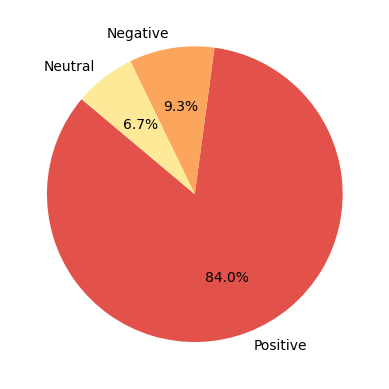

In [27]:
plt.pie(SENTIMENT_COUNTS,
        labels=SENTIMENT_COUNTS.index,
        autopct="%1.1f%%",
        startangle=140,
        colors=sns.color_palette('Spectral'))

In [28]:
Farzi_Pro['text'] = Farzi_Pro['text'].astype(str)

In [29]:
tfidf = vectorizer.fit_transform(Farzi_Pro['text'])

In [30]:
Farzi_Pro.head()

,stars,text,lowercase_text,no_special_chars,tokenized_text,text_cleaned,text_cleaned_joined,sentiment_score,sentiment_category
0,1,i order peanut masala but they surve which is ...,i order peanut masala but they surve which is ...,i order peanut masala but they surve which is ...,"['i', 'order', 'peanut', 'masala', 'but', 'the...","['order', 'peanut', 'masala', 'surve', 'unplea...",order peanut masala surve unpleasant teste,-0.650000,Negative
1,1,I’m giving 1 star because the food was extreme...,i’m giving 1 star because the food was extreme...,im giving 1 star because the food was extremel...,"['im', 'giving', '1', 'star', 'because', 'the'...","['im', 'giving', '1', 'star', 'food', 'extreme...",im giving 1 star food extremely bad tasted lik...,-0.168519,Negative
2,5,Super,super,super,['super'],['super'],super,0.333333,Positive
3,5,Nice,nice,nice,['nice'],['nice'],nice,0.600000,Positive
4,5,It was so good,it was so good,it was so good,"['it', 'was', 'so', 'good']",['good'],good,0.700000,Positive


In [31]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import NMF

vectorizer = TfidfVectorizer(max_df=0.95, min_df=1, stop_words='english')
tfidf = vectorizer.fit_transform(Farzi_Pro['text'])

# 2. Applying NMF
# We specify 5 topics.
num_topics = 5
nmf_model = NMF(n_components=num_topics, random_state=42)
nmf_model.fit(tfidf)

# 3. Display the topics with their top words
def display_topics(model, feature_names, num_top_words):
    for topic_idx, topic in enumerate(model.components_):
        print(f"Topic {topic_idx+1}:")
        print(" ".join([feature_names[i] for i in topic.argsort()[:-num_top_words - 1:-1]]))

num_top_words = 10
feature_names = vectorizer.get_feature_names_out()
display_topics(nmf_model, feature_names, num_top_words)

# 4. Assigning the dominant topic to each document in the DataFrame
topic_results = nmf_model.transform(tfidf)
Farzi_Pro['topic'] = topic_results.argmax(axis=1) + 1  # Adding 1 to make topics 1-5 instead of 0-4

print("\nDataFrame with assigned topics:")
print(Farzi_Pro[['topic']].head())

Topic 1:
great food service himanshu place atmosphere served delicious ambiance experience
Topic 2:
good food ambiance service ambience satish average view services praveen
Topic 3:
nice place ambience jitendra service restaurant osm kumar manjeet nandkishor
Topic 4:
kumar sumit service excellent food manjeet outstanding mr lovely jitendra
Topic 5:
amazing place awesome cafe best ambience food farzi visit music

DataFrame with assigned topics:
   topic
0      5
1      5
2      5
3      3
4      2


C:\Users\parth\AppData\Local\Temp\ipykernel_4436\3750332.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='icefire')


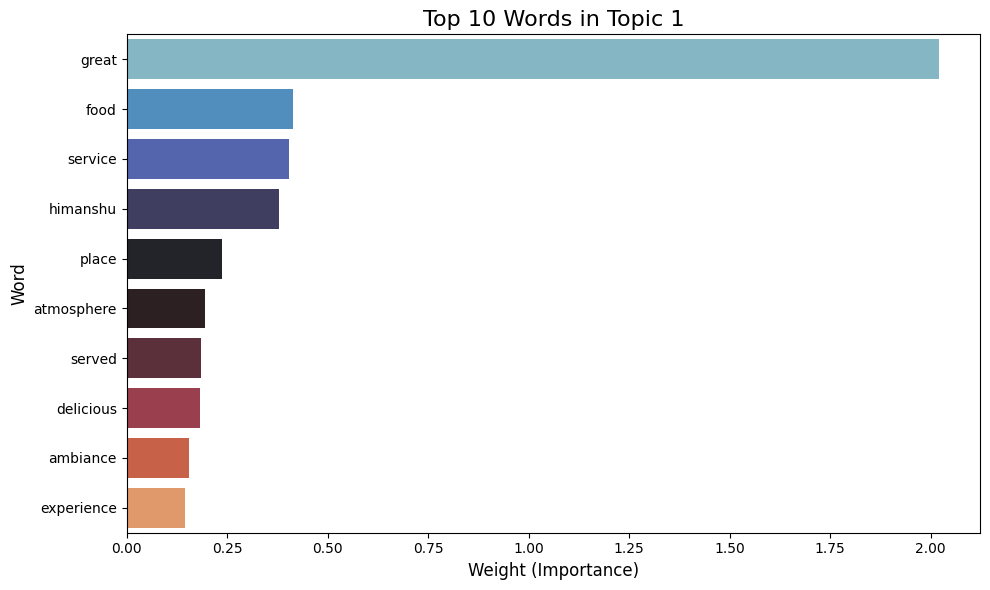

C:\Users\parth\AppData\Local\Temp\ipykernel_4436\3750332.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='icefire')


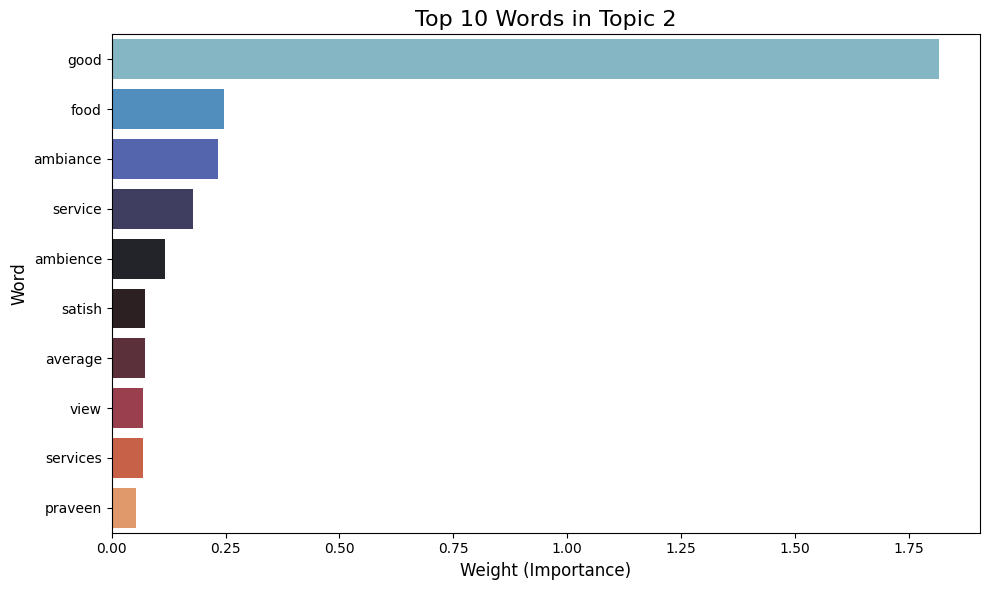

C:\Users\parth\AppData\Local\Temp\ipykernel_4436\3750332.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='icefire')


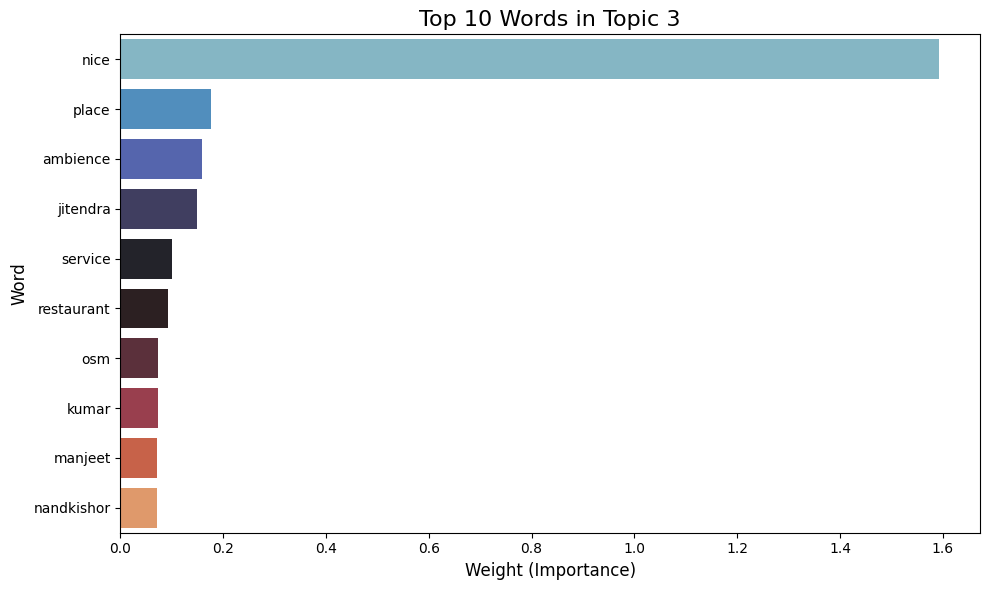

C:\Users\parth\AppData\Local\Temp\ipykernel_4436\3750332.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='icefire')


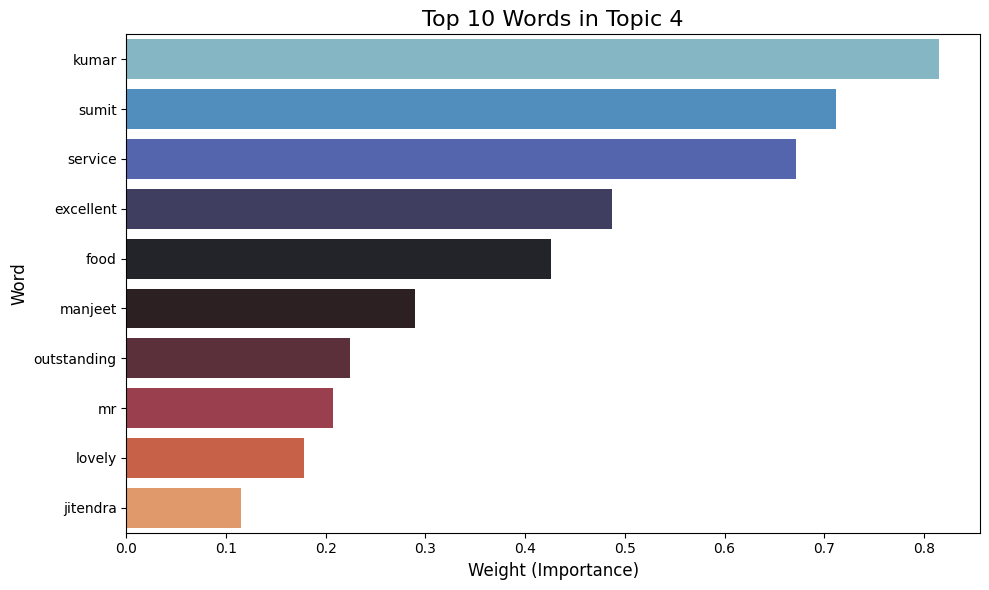

C:\Users\parth\AppData\Local\Temp\ipykernel_4436\3750332.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='weight', y='word', data=topic_df, palette='icefire')


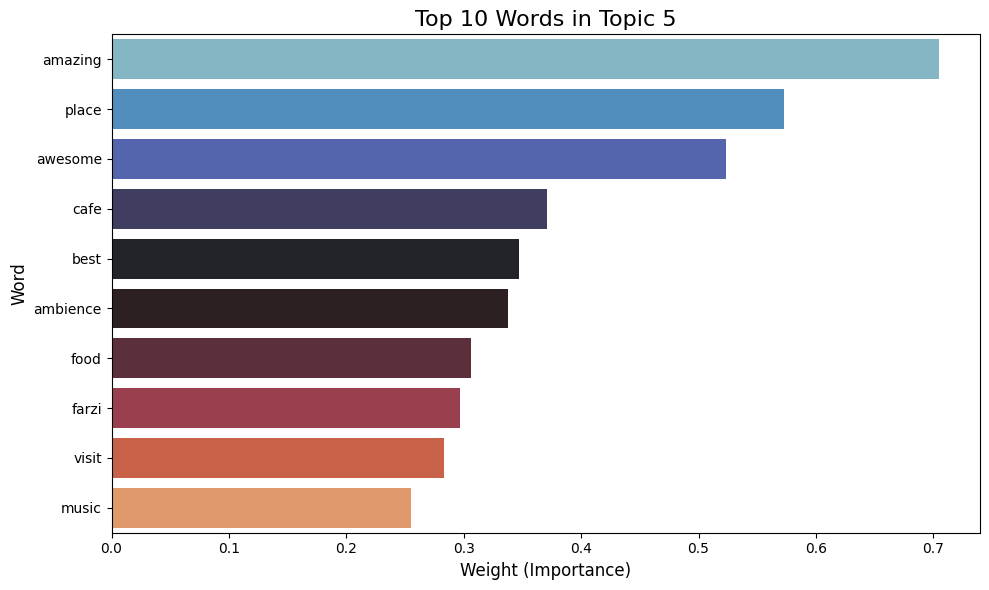

In [44]:
# Get the feature names (words) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()
num_top_words = 10

# Loop through each topic and create a bar chart for its top words
for topic_idx, topic in enumerate(nmf_model.components_):
    # Create a DataFrame for the top words in the current topic
    top_words_indices = topic.argsort()[:-num_top_words - 1:-1]
    top_words = [feature_names[i] for i in top_words_indices]
    top_weights = topic[top_words_indices]

    topic_df = pd.DataFrame({'word': top_words, 'weight': top_weights})

    # Plotting
    plt.figure(figsize=(10, 6))
    sns.barplot(x='weight', y='word', data=topic_df, palette='icefire')
    plt.title(f'Top {num_top_words} Words in Topic {topic_idx + 1}', fontsize=16)
    plt.xlabel('Weight (Importance)', fontsize=12)
    plt.ylabel('Word', fontsize=12)
    plt.tight_layout()
    plt.show()

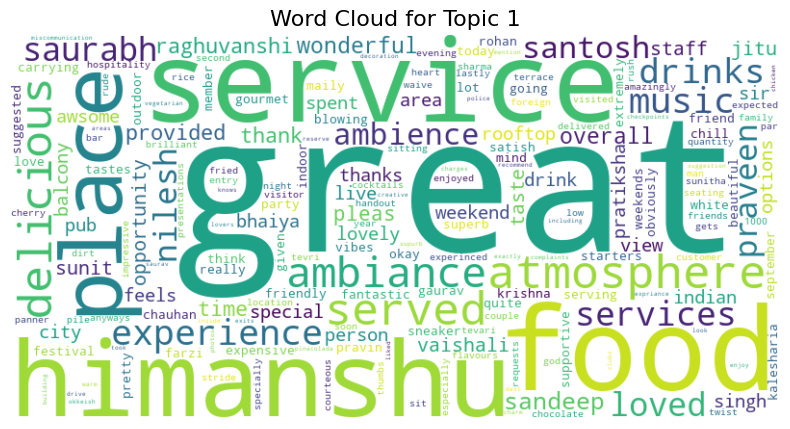

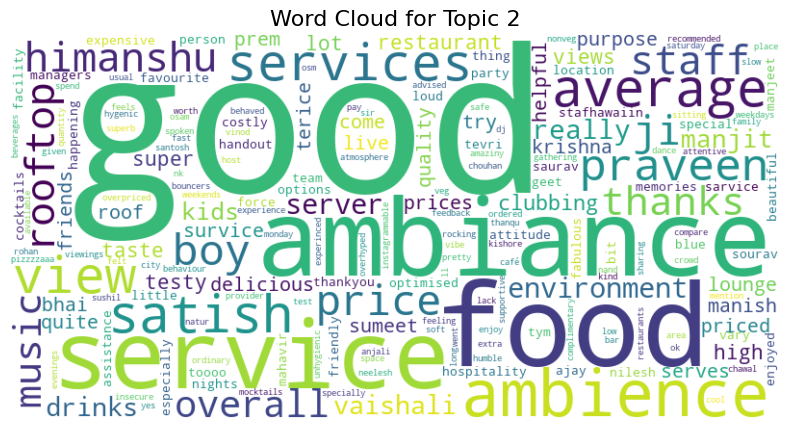

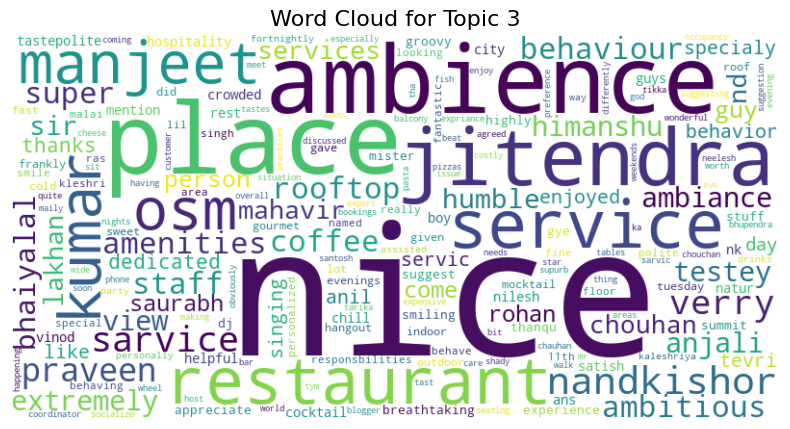

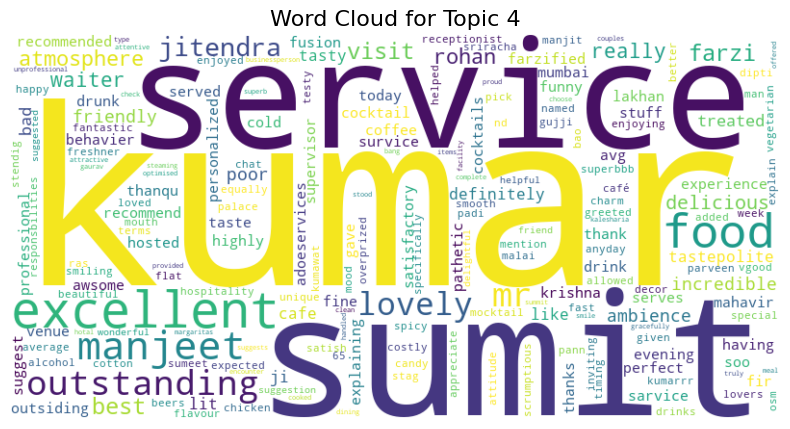

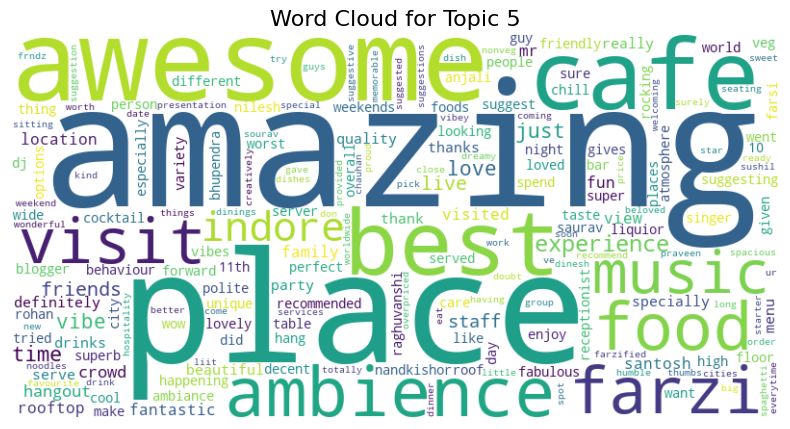

In [49]:
# Get the feature names (words) from the TF-IDF vectorizer
feature_names = vectorizer.get_feature_names_out()

# Loop through each topic and create a word cloud
for topic_idx, topic in enumerate(nmf_model.components_):
    # Create a dictionary of words and their weights for the current topic
    topic_words = {feature_names[i]: topic[i] for i in topic.argsort()}

    # Create the WordCloud object
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(topic_words)

    # Plotting
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(f'Word Cloud for Topic {topic_idx + 1}', fontsize=16)
    plt.axis('off')
    plt.show()